<table><tr>
<td> <img src="new-york.jpg" alt="Drawing" style="height: 250px;"/> </td>
<td> <img src="hollywood-sign.jpg" alt="Drawing" style="height: 250px;"/> </td>
</tr></table>

<h1 align=center><font size = 6>The Big Apple vs Hollywood</font></h1>


## Introduction
This report could have so many names, "The class of the titans", "East vs West", "El classico", but the fact is this fight over which of New York city or Los Angeles is the heart of the United States has been going on, and will most likely go on, for many years. Any of these cities alone has a tremendous influence on the rest of the world, maybe more so than any other city on this planet. From the huge impact that Wall Street has on world economics to the influence of hollywood movies on the everyday lives of each of us, we could speak hours on end about them.  

Aside from this, New York city and Los Angeles remain on the top of the lists of tourists wanting to visit for the first time the US, or for the regular tourists wanting to spend the holidays. Indeed, both are diverse and multicultural and offer a wide palette of experiences that is widely sought after by tourists. In the project we will try to group the neighbourhoods of NYC and LA respectively and draw conclusions on what they both have to offer and if one city stands out more than the other.



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>

2.  <a href="#item2">Explore Neighborhoods in New York City and Los Angeles</a>

3.  <a href="#item3">Analyze Each Neighborhood</a>

4.  <a href="#item4">Cluster Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [296]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 1. Download and Explore Dataset


In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs of New York and the neighborhoods that exist in each borough as well as the the latitude and longitude coordinates of each neighborhood. Los Angeles on the other hand has 272 neighborhood but does not have any Borough division like New York

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: [https://geo.nyu.edu/catalog/nyu_2451_34572](https://geo.nyu.edu/catalog/nyu_2451_34572?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

For Los angeles the csv can be downloaded at this url https://usc.data.socrata.com/dataset/Los-Angeles-Neighborhood-Map/r8qd-yxsr


In [27]:
# New York data
!curl -o newyork_data.json https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

# Los angeles data

print('CSV has been manually downloaded and added to the working folder!')

Data downloaded!
CSV has been manually downloaded and added to the working folder!


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 84  113k   84 97542    0     0  94885      0  0:00:01  0:00:01 --:--:-- 94885
100  113k  100  113k    0     0   100k      0  0:00:01  0:00:01 --:--:--  100k


#### Load and explore the data


Next, let's load the data for New York first


In [28]:
# New york data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)  

Let's take a quick look at the data.


In [6]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [29]:
ny_neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [30]:
ny_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a _pandas_ dataframe


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [225]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [226]:
ny_neighborhoods

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.


In [227]:
for data in ny_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [228]:
ny_neighborhoods.head()

Neighborhood   Latitude  Longitude
0    Wakefield  40.894705 -73.847201
1   Co-op City  40.874294 -73.829939
2  Eastchester  40.887556 -73.827806
3    Fieldston  40.895437 -73.905643
4    Riverdale  40.890834 -73.912585

In [235]:
ny_neighborhoods = ny_neighborhoods.drop_duplicates(subset=['Neighborhood'])
print('The dataframe has {} neighborhoods.'.format(
        len(ny_neighborhoods['Neighborhood'].unique()),
    )
)
ny_neighborhoods.shape

The dataframe has 302 neighborhoods.


(302, 3)

##### Now, let's do the same for Los Angeles

In [55]:
losangeles_data = pd.read_csv('la_neighborhoods.csv')
losangeles_data.head()

set             slug  \
0  L.A. County Neighborhoods (Current)            acton   
1  L.A. County Neighborhoods (Current)  adams-normandie   
2  L.A. County Neighborhoods (Current)     agoura-hills   
3  L.A. County Neighborhoods (Current)       agua-dulce   
4  L.A. County Neighborhoods (Current)         alhambra   

                                            the_geom  \
0  MULTIPOLYGON (((-118.20261747920541 34.5389897...   
1  MULTIPOLYGON (((-118.30900800000012 34.0374109...   
2  MULTIPOLYGON (((-118.76192500000009 34.1682029...   
3  MULTIPOLYGON (((-118.2546773959221 34.55830403...   
4  MULTIPOLYGON (((-118.12174700000014 34.1050399...   

                                 kind       external_i             name  \
0  L.A. County Neighborhood (Current)            acton            Acton   
1  L.A. County Neighborhood (Current)  adams-normandie  Adams-Normandie   
2  L.A. County Neighborhood (Current)     agoura-hills     Agoura Hills   
3  L.A. County Neighborhood (Current)       agua-dulce       Agua Dulce   
4  L.A. County Neighborhood (Current)         alhambra         Alhambra   

                                          display_na       sqmi  \
0           Acton L.A. County Neighborhood (Current)  39.339109   
1  Adams-Normandie L.A. County Neighborhood (Curr...   0.805350   
2    Agoura Hills L.A. County Neighborhood (Current)   8.146760   
3      Agua Dulce L.A. County Neighborhood (Current)  31.462632   
4        Alhambra L.A. County Neighborhood (Current)   7.623814   

                  type  name_1  slug_1    latitude  longitude  \
0  unincorporated-area     NaN     NaN -118.169810  34.497355   
1    segment-of-a-city     NaN     NaN -118.300208  34.031461   
2      standalone-city     NaN     NaN -118.759885  34.146736   
3  unincorporated-area     NaN     NaN -118.317104  34.504927   
4      standalone-city     NaN     NaN -118.136512  34.085539   

                                        location  
0  POINT(34.497355239240846 -118.16981019229348)  
1  POINT(34.031461499124156 -118.30020800000011)  
2  POINT(34.146736499122795 -118.75988450000015)  
3   POINT(34.504926999796837 -118.3171036690717)  
4  POINT(34.085538999123571 -118.13651200000021)

We will drop the unnecessary columns, also notice that the Lat/Long are inversed, so we will switch them

In [339]:
columns_of_interest = ['name','longitude','latitude']
la_neigborhoods = losangeles_data[columns_of_interest]
la_neigborhoods.columns=['Neighborhood','Latitude','Longitude']
la_neigborhoods = la_neigborhoods.drop_duplicates(subset=['Neighborhood'])
la_neigborhoods.head()
la_neigborhoods.shape


(272, 3)

In [70]:
# Checking for NaN
la_neigborhoods.isnull().sum()

Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.


In [51]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [52]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], ny_neighborhoods['Longitude'], ny_neighborhoods['Borough'], ny_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Use geopy library to get the latitude and longitude values of Los Angeles


In [57]:
address = 'Los angeles, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


#### Create a map of Los Angeles with neighborhoods superimposed on top.


In [60]:
# create map of New York using latitude and longitude values
map_losangeles = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(la_neigborhoods['Latitude'], la_neigborhoods['Longitude'], la_neigborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_losangeles)  
    
map_losangeles

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


## 2.Explore Neighborhoods in New York City and Los Angeles


#### Define Foursquare Credentials and Version


In [73]:
CLIENT_ID = '1GIPSINA0UKPPFBLJQC312GZ21CJJBQ5ZNFMRKEIRGXPMCYN' # your Foursquare ID
CLIENT_SECRET = 'NX1IFRBWPN4OHH2EG5EYA24KR5Y5NSNTXKHKEIOA2LX01JE2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1GIPSINA0UKPPFBLJQC312GZ21CJJBQ5ZNFMRKEIRGXPMCYN
CLIENT_SECRET:NX1IFRBWPN4OHH2EG5EYA24KR5Y5NSNTXKHKEIOA2LX01JE2


#### Let's create a function to get the venues for to all the neighborhoods in NY and LA


In [78]:
import requests # library to handle requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Getting all the venues for each neighborhood in dataframes ny_venues and la_venues 


In [79]:
# New York venues
ny_venues = getNearbyVenues(ny_neighborhoods['Neighborhood'], ny_neighborhoods['Latitude'], ny_neighborhoods['Longitude'])

In [82]:
# los angeles venues
la_venues = getNearbyVenues(la_neigborhoods['Neighborhood'], la_neigborhoods['Latitude'], la_neigborhoods['Longitude'])

#### Let's check the size of the resulting dataframe


In [84]:
print('New York Venues : ', ny_venues.shape)
print('Los Angeles Venues : ', la_venues.shape)



New York Venues :  (10116, 7)
Los Angeles Venues :  (2963, 7)


This is already an interesting result: there seems to be three times as many venues in New York than Los Angeles, although NYC is smaller than Los Angeles

In [85]:
ny_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

In [86]:
la_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0            Acton              34.497355             -118.169810   
1            Acton              34.497355             -118.169810   
2  Adams-Normandie              34.031461             -118.300208   
3  Adams-Normandie              34.031461             -118.300208   
4  Adams-Normandie              34.031461             -118.300208   

                Venue  Venue Latitude  Venue Longitude  \
0    Epik Engineering       34.498718      -118.168046   
1  Alma Gardening Co.       34.494762      -118.172550   
2   Orange Door Sushi       34.032485      -118.299368   
3               Shell       34.033095      -118.300025   
4         Little Xian       34.032292      -118.299465   

               Venue Category  
0  Construction & Landscaping  
1  Construction & Landscaping  
2            Sushi Restaurant  
3                 Gas Station  
4            Sushi Restaurant

Let's check how many venues were returned for each neighborhood


In [87]:
ny_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      31                      31   
Annadale                                      11                      11   
Arden Heights                                  5                       5   
Arlington                                      6                       6   
Arrochar                                      22                      22   
Arverne                                       20                      20   
Astoria                                       99                      99   
Astoria Heights                               13                      13   
Auburndale                                    22                      22   
Bath Beach                                    46                      46   
Battery Park City                             66                      66   
Bay Ridge                                     81                      81   
Bay Terrace                                   47                      47   
Baychester                                    20                      20   
Bayside                                       72                      72   
Bayswater                                      1                       1   
Bedford Park                                  36                      36   
Bedford Stuyvesant                            28                      28   
Beechhurst                                    16                      16   
Bellaire                                      13                      13   
Belle Harbor                                  17                      17   
Bellerose                                     19                      19   
Belmont                                       97                      97   
Bensonhurst                                   36                      36   
Bergen Beach                                   7                       7   
Blissville                                    19                      19   
Bloomfield                                     4                       4   
Boerum Hill                                   90                      90   
Borough Park                                  22                      22   
Breezy Point                                   5                       5   
Briarwood                                     10                      10   
Brighton Beach                                43                      43   
Broad Channel                                  5                       5   
Broadway Junction                             20                      20   
Bronxdale                                     14                      14   
Brooklyn Heights                             100                     100   
Brookville                                     2                       2   
Brownsville                                   16                      16   
Bulls Head                                    45                      45   
Bushwick                                      70                      70   
Butler Manor                                   4                       4   
Cambria Heights                               11                      11   
Canarsie                                       6                       6   
Carnegie Hill                                 89                      89   
Carroll Gardens                              100                     100   
Castle Hill                                    8                       8   
Castleton Corners                             14                      14   
Central Harlem                                45                      45   
Charleston                                    27                      27   
Chelsea                                      106                     106   
Chinatown                                    100                     100   

In [88]:
la_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                   
Acton                                                      2   
Adams-Normandie                                            9   
Agoura Hills                                              27   
Agua Dulce                                                 1   
Alhambra                                                  14   
Alondra Park                                               3   
Altadena                                                   5   
Arcadia                                                   24   
Arleta                                                     5   
Arlington Heights                                         29   
Artesia                                                   31   
Atwater Village                                           23   
Avalon                                                     4   
Avocado Heights                                           12   
Azusa                                                      9   
Baldwin Hills/Crenshaw                                     4   
Baldwin Park                                               6   
Bel-Air                                                    2   
Bell                                                       2   
Bell Gardens                                              11   
Bellflower                                                14   
Beverly Grove                                            100   
Beverly Hills                                              1   
Beverlywood                                                5   
Boyle Heights                                              6   
Bradbury                                                   2   
Brentwood                                                  2   
Broadway-Manchester                                        4   
Burbank                                                   16   
Canoga Park                                                7   
Carthay                                                   20   
Central-Alameda                                            4   
Century City                                              60   
Cerritos                                                   3   
Charter Oak                                                4   
Chatsworth                                                 1   
Chesterfield Square                                        6   
Cheviot Hills                                              1   
Chinatown                                                 46   
Citrus                                                     8   
Commerce                                                   3   
Compton                                                   17   
Covina                                                    11   
Cudahy                                                    13   
Culver City                                               44   
Cypress Park                                               4   
Del Aire                                                  14   
Del Rey                                                   22   
Diamond Bar                                               33   
Downey                                                    43   
Downtown                                                  20   
Eagle Rock                                                 2   
East Compton                                               6   
East Hollywood                                            15   
East Los Angeles                                          14   
East Pasadena                                              1   
East San Gabriel                                          12   
Echo Park                                                 39   
El Monte                                                  11   
El Segundo                                                10   
El Sereno                                                 15   
Elizabe

#### Let's find out how many unique categories can be curated from all the returned venues


In [90]:
print('There are {} uniques categories in New York City.'.format(len(ny_venues['Venue Category'].unique())))
print('There are {} uniques categories in Los Angeles.'.format(len(la_venues['Venue Category'].unique())))

There are 428 uniques categories in New York City.
There are 316 uniques categories in Los Angeles.


##### Another interesting result: more venu categories in NY than LA . Let's have a look at the differences

##### Venues that are in NYC that are not in LA and vice-versa

In [112]:
# Define function that returns items in List 1 that are not in List 2 or vice versa
def Diff(li1, li2): 
    return (list(set(li1)-set(li2)) ) 

# Categories in NY and LA
ny_cat = ny_venues['Venue Category'].unique()
la_cat = la_venues['Venue Category'].unique()


ny_diff = Diff(ny_cat, la_cat)
ny_diff

['Pet Café',
 'Israeli Restaurant',
 'Print Shop',
 'Waste Facility',
 'Dosa Place',
 'Mini Golf',
 'Bike Shop',
 'Memorial Site',
 'Newsstand',
 'Swiss Restaurant',
 'Caucasian Restaurant',
 'Herbs & Spices Store',
 'Auto Garage',
 'Tennis Stadium',
 'Whisky Bar',
 'Gluten-free Restaurant',
 'Beer Garden',
 'Fruit & Vegetable Store',
 'Bike Trail',
 'Climbing Gym',
 'Outlet Store',
 'Lebanese Restaurant',
 'Soccer Field',
 'Piercing Parlor',
 'History Museum',
 'Scandinavian Restaurant',
 'Turkish Restaurant',
 'Toll Plaza',
 'Eye Doctor',
 'Ski Area',
 'Vape Store',
 'Arepa Restaurant',
 'Piano Bar',
 'Resort',
 'Used Bookstore',
 'Street Art',
 'Club House',
 'Adult Boutique',
 'Train',
 'Stadium',
 'Varenyky restaurant',
 'Burmese Restaurant',
 'Japanese Curry Restaurant',
 'Outlet Mall',
 'Jewish Restaurant',
 'German Restaurant',
 'Veterinarian',
 'Laundry Service',
 'Event Service',
 'Professional & Other Places',
 'School',
 'Cooking School',
 'Moroccan Restaurant',
 'Miscellan

##### Venues that are in LA but not in NYC

In [113]:
la_diff = Diff( la_cat, ny_cat)
la_diff

['ATM',
 'Transportation Service',
 'Light Rail Station',
 'Satay Restaurant',
 'Watch Shop',
 'Souvenir Shop',
 'Mountain',
 'Notary',
 'Food Service',
 'Dongbei Restaurant',
 'Auto Workshop',
 'Science Museum',
 'Stables',
 'Road',
 'Escape Room',
 'Film Studio',
 'General Travel',
 'Indoor Play Area',
 'Tree',
 'Financial or Legal Service',
 'Bed & Breakfast',
 'English Restaurant',
 'College Residence Hall',
 'Photography Lab',
 'Canal',
 'Marijuana Dispensary',
 'Fabric Shop',
 'Football Stadium',
 'Fraternity House',
 'Lighting Store',
 'Government Building',
 'Reservoir',
 'Disc Golf',
 'Airport',
 'Doner Restaurant',
 'Tour Provider',
 'Andhra Restaurant']

Although this is not very representative, we can spot a few things like various etchnic restaurants that are in NYC but not in LA , and on the other hand, venues like 'Marijuana Dispensary' that are in LA but not in NYC: this could be a deal breaker for some ;) (PS: don't do drugs!...unless it's legal)

## 3. Analyze Each Neighborhood


We will now analyze each neighborhood more in dept

### 3.1 New York

In [119]:
ny_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

In [130]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

ny_onehot.drop(columns=['Neighborhood'], inplace=True)
# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Wakefield                  0               0                  0   
1    Wakefield                  0               0                  0   
2    Wakefield                  0               0                  0   
3    Wakefield                  0               0                  0   
4    Wakefield                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                   0                 0                    0             0   
1                   0                 0                    0             0   
2                   0                 0                    0             0   
3                   0                 0                    0             0   
4                   0                 0                    0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0                0          0           0           0       0   
1            0                0          0           0           0       0   
2            0                0          0           0           0       0   
3            0                0          0           0           0       0   
4            0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0      0          0         0            0           0              0   
1      0          0         0            0           0              0   
2      0          0         0            0           0              0   
3      0          0         0            0           0              0   
4      0          0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0

And let's examine the new dataframe size.


In [131]:
ny_onehot.shape

(10116, 428)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [132]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped[0:20]

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0             Allerton           0.000000             0.0                0.0   
1             Annadale           0.000000             0.0                0.0   
2        Arden Heights           0.000000             0.0                0.0   
3            Arlington           0.000000             0.0                0.0   
4             Arrochar           0.000000             0.0                0.0   
5              Arverne           0.000000             0.0                0.0   
6              Astoria           0.000000             0.0                0.0   
7      Astoria Heights           0.000000             0.0                0.0   
8           Auburndale           0.000000             0.0                0.0   
9           Bath Beach           0.000000             0.0                0.0   
10   Battery Park City           0.000000             0.0                0.0   
11           Bay Ridge           0.000000             0.0                0.0   
12         Bay Terrace           0.021277             0.0                0.0   
13          Baychester           0.000000             0.0                0.0   
14             Bayside           0.000000             0.0                0.0   
15           Bayswater           0.000000             0.0                0.0   
16        Bedford Park           0.000000             0.0                0.0   
17  Bedford Stuyvesant           0.000000             0.0                0.0   
18          Beechhurst           0.000000             0.0                0.0   
19            Bellaire           0.000000             0.0                0.0   

    African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                  0.0               0.0             0.000000           0.0   
1                  0.0               0.0             0.181818           0.0   
2                  0.0               0.0             0.000000           0.0   
3                  0.0               0.0             0.000000           0.0   
4                  0.0               0.0             0.000000           0.0   
5                  0.0               0.0             0.000000           0.0   
6                  0.0               0.0             0.000000           0.0   
7                  0.0               0.0             0.000000           0.0   
8                  0.0               0.0             0.045455           0.0   
9                  0.0               0.0             0.000000           0.0   
10                 0.0               0.0             0.000000           0.0   
11                 0.0               0.0             0.037037           0.0   
12                 0.0               0.0             0.042553           0.0   
13                 0.0               0.0             0.000000           0.0   
14                 0.0               0.0             0.027778           0.0   
15                 0.0               0.0             0.000000           0.0   
16                 0.0               0.0             0.000000           0.0   
17                 0.0               0.0             0.000000           0.0   
18                 0.0               0.0             0.000000           0.0   
19                 0.0               0.0             0.000000           0.0   

    Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0     0.00               0.0                     0.0          0.0         0.0   
1     0.00               0.0                     0.0          0.0         0.0   
2     0.00               0.0                     0.0          0.0         0.0   
3     0.00               0.0                     0.0          0.0         0.0   
4     0.00               0.0                     0.0          0.0         0.0   
5     0.00               0.0                     0.0          0.0         0.0   
6     0.00               0.0                     0.0          0.0         0.0   
7     0.00           

#### Let's confirm the new size


In [133]:
ny_grouped.shape

(302, 428)

#### Let's now print each neighborhood in NY along with the top 10 most common venues and put that in a pandas dataframe


First, let's write a function to sort the venues in descending order. We will use the functions previously given in the labs


In [136]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [209]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ny_neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place    Chinese Restaurant   
1       Annadale           Pizza Place   American Restaurant   
2  Arden Heights              Pharmacy         Deli / Bodega   
3      Arlington         Deli / Bodega           Coffee Shop   
4       Arrochar              Bus Stop    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Discount Store         Deli / Bodega                   Spa   
1          Dance Studio            Restaurant                  Food   
2           Coffee Shop              Bus Stop           Pizza Place   
3              Bus Stop          Home Service         Boat or Ferry   
4         Deli / Bodega                 Hotel           Supermarket   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0           Supermarket   Fried Chicken Joint             Donut Shop   
1         Train Station                 Diner                   Park   
2           Flea Market               Factory     Falafel Restaurant   
3         Grocery Store           Yoga Studio            Flea Market   
4          Liquor Store        Sandwich Place  Outdoors & Recreation   

  9th Most Common Venue 10th Most Common Venue  
0                Bakery               Pharmacy  
1         Deli / Bodega      Fish & Chips Shop  
2                  Farm         Farmers Market  
3    Falafel Restaurant                   Farm  
4              Pharmacy            Pizza Place

<a id='item4'></a>


### 3.2 Los Angeles

In [341]:
la_venues.head()

(2963, 7)

In [349]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

la_onehot.drop(columns=['Neighborhood'], inplace=True)
# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

234

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [333]:
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()
la_grouped[0:20]

(234, 316)

#### Let's now print each neighborhood in LA along with the top 10 most common venues and put that in a pandas dataframe


In [147]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
la_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
la_neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    la_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

la_neighborhoods_venues_sorted.head()

Neighborhood       1st Most Common Venue 2nd Most Common Venue  \
0            Acton  Construction & Landscaping           Yoga Studio   
1  Adams-Normandie            Sushi Restaurant                  Park   
2     Agoura Hills        Fast Food Restaurant    Chinese Restaurant   
3       Agua Dulce                     Airport           Yoga Studio   
4         Alhambra           Convenience Store            Bagel Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant    English Restaurant           Escape Room   
1          Home Service           Gas Station            Playground   
2        Breakfast Spot            Restaurant       Thai Restaurant   
3   Filipino Restaurant           Escape Room  Ethiopian Restaurant   
4   Sporting Goods Shop  Fast Food Restaurant             Pet Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Ethiopian Restaurant           Fabric Shop    Falafel Restaurant   
1         Grocery Store            Taco Place    Falafel Restaurant   
2          Liquor Store                Lounge      Sushi Restaurant   
3           Fabric Shop    Falafel Restaurant                  Farm   
4        Hardware Store           Video Store    Mexican Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0                  Farm         Farmers Market  
1   Empanada Restaurant     English Restaurant  
2                Bakery         Shipping Store  
3        Farmers Market   Fast Food Restaurant  
4      Business Service            Pizza Place

## 4. Cluster Neighborhoods


Before clustering, we need to determine how many clusters we are going to use. We could make a guess but it would be better to find the optimum number of clusters by evaluating the score with each iteration of k. This score is the ***Silhouette Coefficient*** score, the higher it is the better the clustering. The Silhouette Coefficient is defined as such for each sample: 

<SC=(b-a)/max(a,b)>

where a nd b are defined as follows :

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.



Now, to find the optimal value of k we will loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample, we will retain the k with the highest Silhouette Coefficient.



For more information on Silhouette-coefficient please check out this link: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

### 4.1 New York Clusters

In [313]:
# Let's import the packages we will need
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np


#### Let's merge the dataframes to have the Lat/Long of the neighborhood, this will be useful for visualizing the clusters

In [237]:
ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

ny_merged = ny_neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(ny_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
ny_merged.head()

Neighborhood   Latitude  Longitude 1st Most Common Venue  \
0    Wakefield  40.894705 -73.847201              Pharmacy   
1   Co-op City  40.874294 -73.829939           Bus Station   
2  Eastchester  40.887556 -73.827806           Bus Station   
3    Fieldston  40.895437 -73.905643                 River   
4    Riverdale  40.890834 -73.912585                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Laundromat         Deli / Bodega        Sandwich Place   
1     Accessories Store           Pizza Place         Grocery Store   
2  Caribbean Restaurant         Deli / Bodega                 Diner   
3                 Plaza  Medical Supply Store           Yoga Studio   
4            Food Truck                   Gym          Home Service   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Gas Station          Dessert Shop            Donut Shop   
1  Fast Food Restaurant    Chinese Restaurant                  Park   
2     Convenience Store  Fast Food Restaurant    Chinese Restaurant   
3           Fish Market               Exhibit            Eye Doctor   
4         Moving Target                 Plaza                  Bank   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Pizza Place        Ice Cream Shop            Yoga Studio  
1                   Bar            Bagel Shop                  Trail  
2    Seafood Restaurant       Automotive Shop            Pizza Place  
3               Factory    Falafel Restaurant                   Farm  
4           Bus Station            Playground         Farmers Market

### We set up our model and loop through different values of n_clusters, we will plot the Silhouette coefficient along with the clusters.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5810499567959403
For n_clusters = 3 The average silhouette_score is : 0.5527144141283442
For n_clusters = 4 The average silhouette_score is : 0.08851062368643817
For n_clusters = 5 The average silhouette_score is : 0.057935672887735906
For n_clusters = 6 The average silhouette_score is : 0.03451582343103138
For n_clusters = 8 The average silhouette_score is : 0.044380948082712805
For n_clusters = 10 The average silhouette_score is : 0.03549511298721883
For n_clusters = 12 The average silhouette_score is : 0.03428669109468017
For n_clusters = 14 The average silhouette_score is : 0.036435374945991125


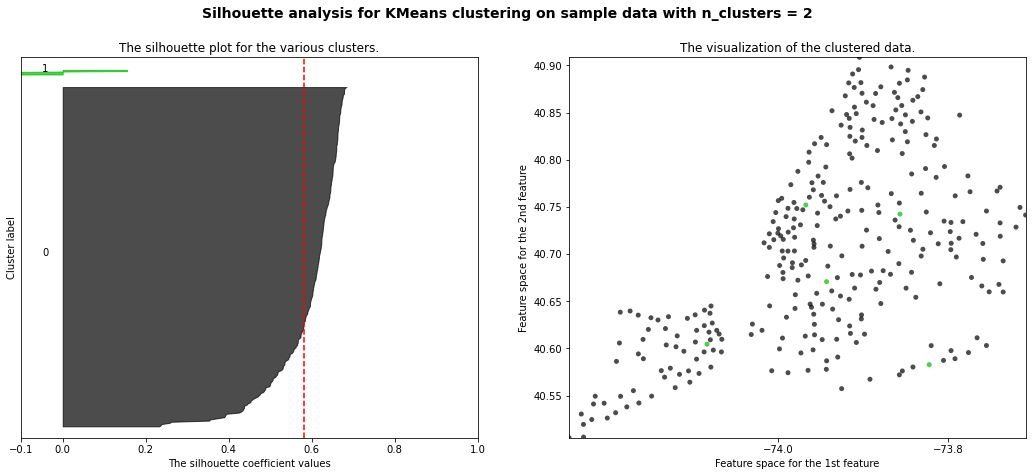

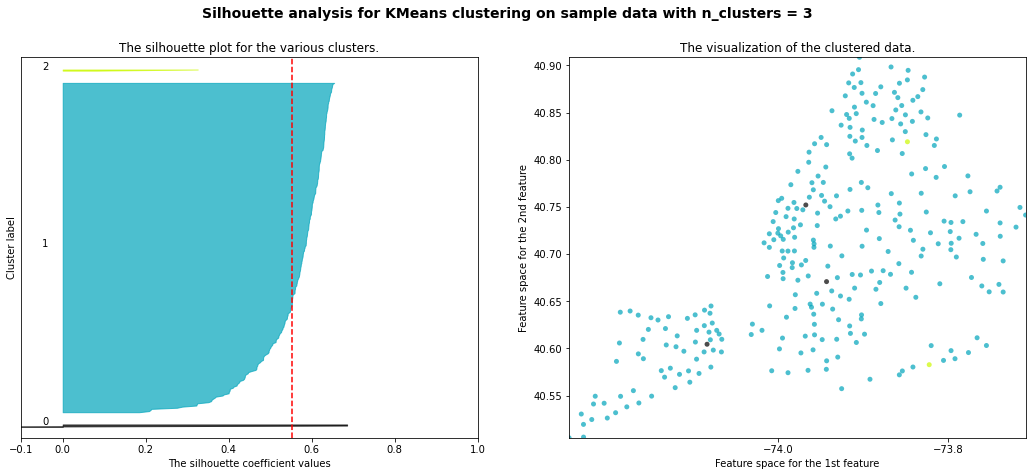

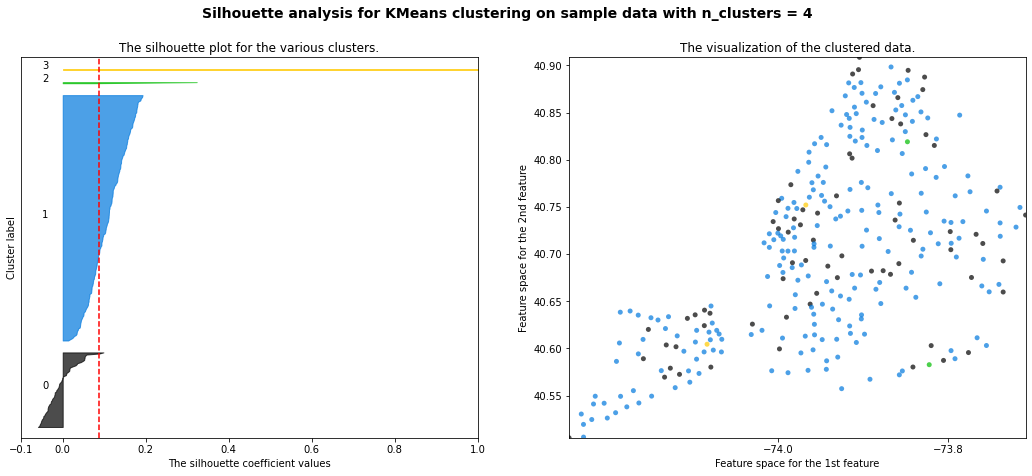

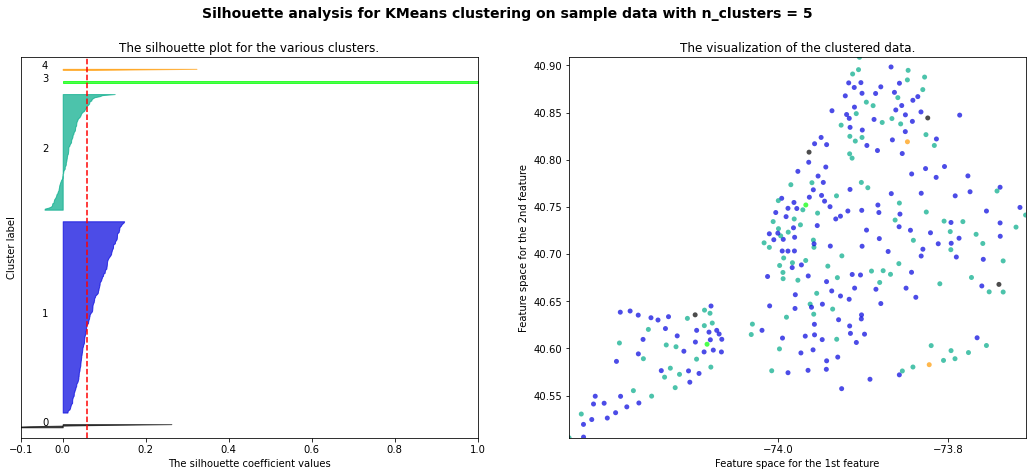

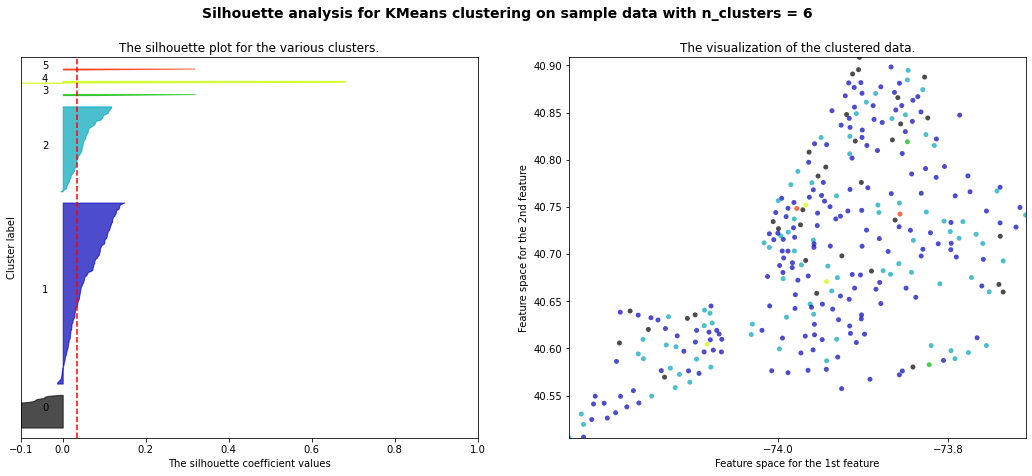

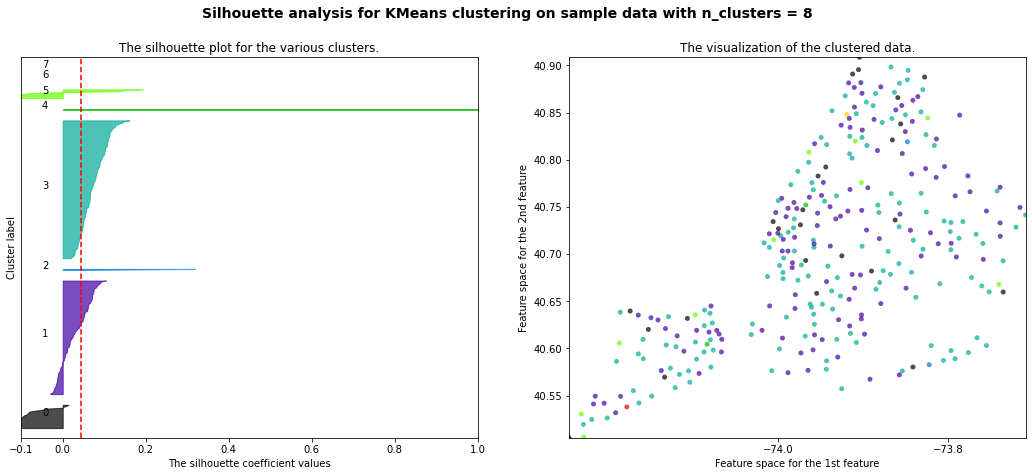

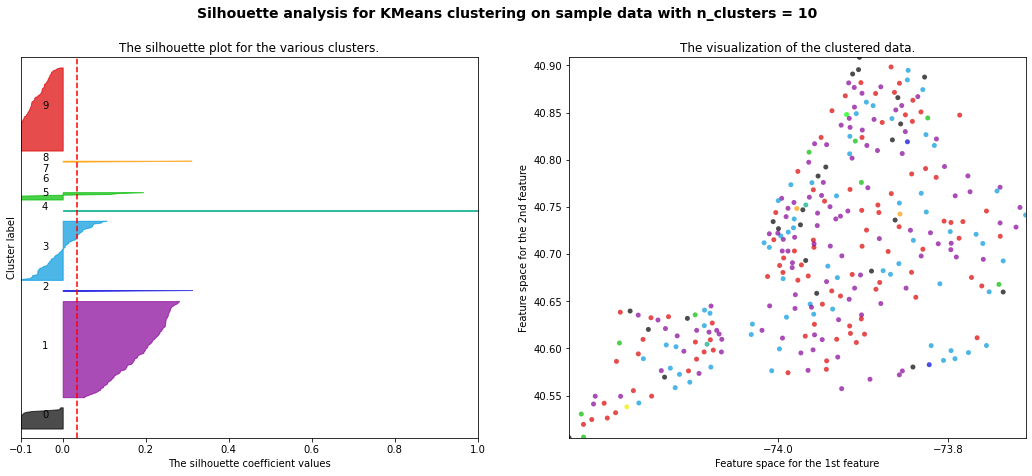

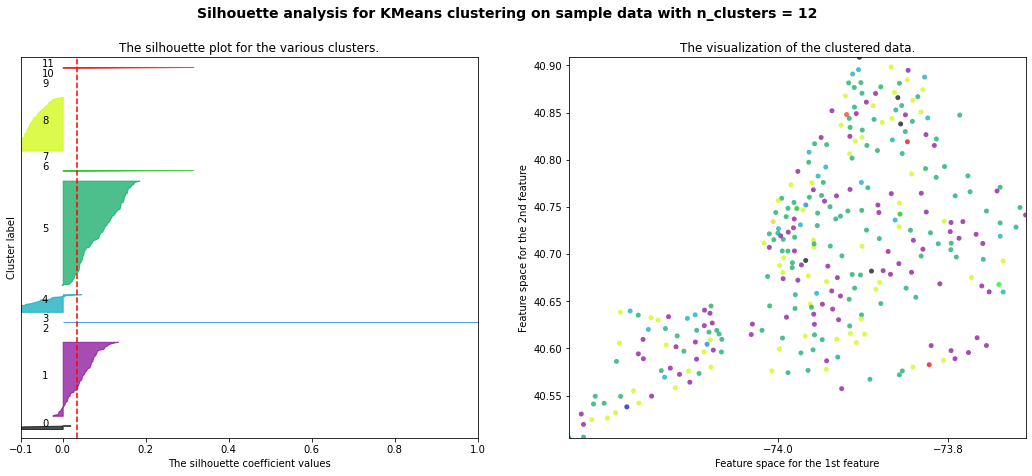

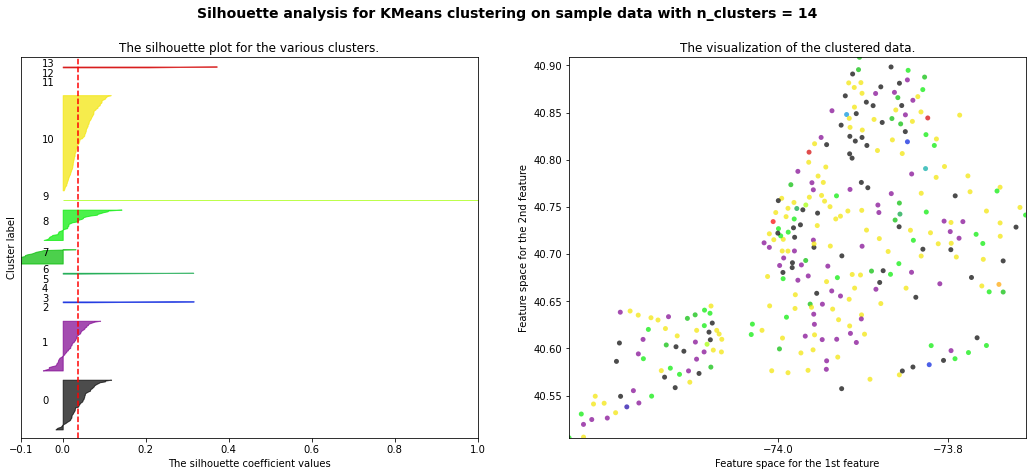

In [308]:
# Fetching our latituted and liongitudes for later

X=np.zeros((len(ny_merged['Longitude']), 2))
X[:,0] = ny_merged['Longitude']
X[:,1] = ny_merged['Latitude']
#X.shape

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(ny_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(ny_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ny_grouped_clustering, cluster_labels)
    
    #print('Size of cluster labels = ', len(cluster_labels))

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    ax2.set_xticks([-74, -73.8, -73.6, -73.4, -73.2, -73, -72.8])
    ax2.set_xlim([min(X[:,0]), max(X[:,0])])
    ax2.set_ylim([min(X[:,1]), max(X[:,1])])
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### From the Silouhette score we can see that the optimal number of clusters is 3 .
### We are going to cluster them in 3 and then analyze each cluster 

In [319]:
# Let's cluster new york in 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(ny_grouped_clustering)
kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### We insert the cluster labels into our dataframe

In [320]:
# add clustering labels
#ny_merged.insert(0, 'Cluster Labels', kmeans)
ny_merged['Cluster Labels']= kmeans
ny_merged.head()

Cluster Labels Neighborhood   Latitude  Longitude 1st Most Common Venue  \
0               1    Wakefield  40.894705 -73.847201              Pharmacy   
1               1   Co-op City  40.874294 -73.829939           Bus Station   
2               1  Eastchester  40.887556 -73.827806           Bus Station   
3               1    Fieldston  40.895437 -73.905643                 River   
4               1    Riverdale  40.890834 -73.912585                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Laundromat         Deli / Bodega        Sandwich Place   
1     Accessories Store           Pizza Place         Grocery Store   
2  Caribbean Restaurant         Deli / Bodega                 Diner   
3                 Plaza  Medical Supply Store           Yoga Studio   
4            Food Truck                   Gym          Home Service   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Gas Station          Dessert Shop            Donut Shop   
1  Fast Food Restaurant    Chinese Restaurant                  Park   
2     Convenience Store  Fast Food Restaurant    Chinese Restaurant   
3           Fish Market               Exhibit            Eye Doctor   
4         Moving Target                 Plaza                  Bank   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Pizza Place        Ice Cream Shop            Yoga Studio  
1                   Bar            Bagel Shop                  Trail  
2    Seafood Restaurant       Automotive Shop            Pizza Place  
3               Factory    Falafel Restaurant                   Farm  
4           Bus Station            Playground         Farmers Market

In [321]:
# create map

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Finally let's visualize that on a map

In [322]:

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 4.2 Los Angeles

In [354]:
la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

#la_merged = la_neigborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
la_merged = la_neighborhoods_venues_sorted.merge(la_neigborhoods, on='Neighborhood')
la_merged.head()

print(la_merged.shape)
print(la_neigborhoods.shape)
print(la_neighborhoods_venues_sorted.shape)
print(la_grouped.shape)
la_merged.head()

(234, 13)
(272, 3)
(234, 11)
(234, 316)


Neighborhood       1st Most Common Venue 2nd Most Common Venue  \
0            Acton  Construction & Landscaping           Yoga Studio   
1  Adams-Normandie            Sushi Restaurant                  Park   
2     Agoura Hills        Fast Food Restaurant    Chinese Restaurant   
3       Agua Dulce                     Airport           Yoga Studio   
4         Alhambra           Convenience Store            Bagel Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant    English Restaurant           Escape Room   
1          Home Service           Gas Station            Playground   
2        Breakfast Spot            Restaurant       Thai Restaurant   
3   Filipino Restaurant           Escape Room  Ethiopian Restaurant   
4   Sporting Goods Shop  Fast Food Restaurant             Pet Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Ethiopian Restaurant           Fabric Shop    Falafel Restaurant   
1         Grocery Store            Taco Place    Falafel Restaurant   
2          Liquor Store                Lounge      Sushi Restaurant   
3           Fabric Shop    Falafel Restaurant                  Farm   
4        Hardware Store           Video Store    Mexican Restaurant   

  9th Most Common Venue 10th Most Common Venue   Latitude   Longitude  
0                  Farm         Farmers Market  34.497355 -118.169810  
1   Empanada Restaurant     English Restaurant  34.031461 -118.300208  
2                Bakery         Shipping Store  34.146736 -118.759885  
3        Farmers Market   Fast Food Restaurant  34.504927 -118.317104  
4      Business Service            Pizza Place  34.085539 -118.136512

### We set up our model and loop through different values of n_clusters, we will plot the Silhouette coefficient along with the clusters.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2678924759231733
For n_clusters = 3 The average silhouette_score is : 0.2791666976233003
For n_clusters = 4 The average silhouette_score is : 0.2616872271009427
For n_clusters = 5 The average silhouette_score is : 0.2627115025607169
For n_clusters = 6 The average silhouette_score is : 0.21992299502690607
For n_clusters = 8 The average silhouette_score is : 0.02111794726009995
For n_clusters = 10 The average silhouette_score is : 0.07360466966440993
For n_clusters = 12 The average silhouette_score is : 0.08001408331511495
For n_clusters = 14 The average silhouette_score is : 0.08452481463612738


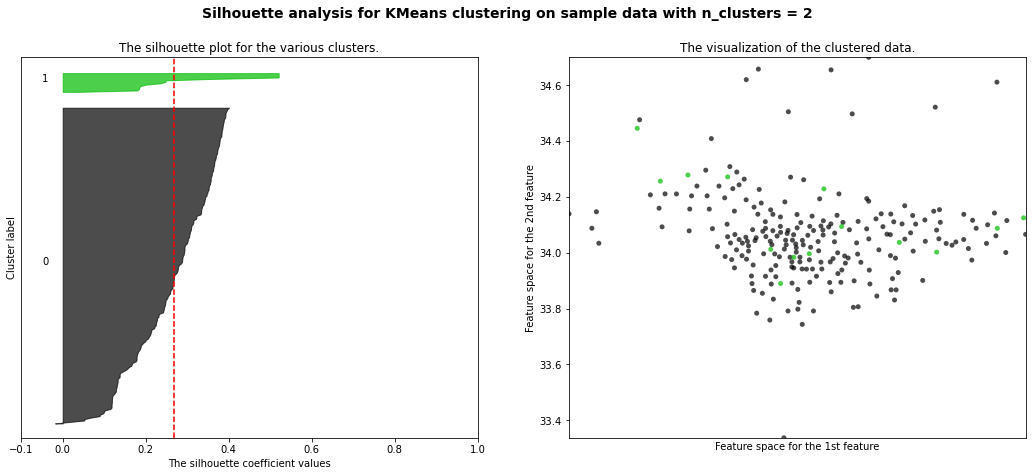

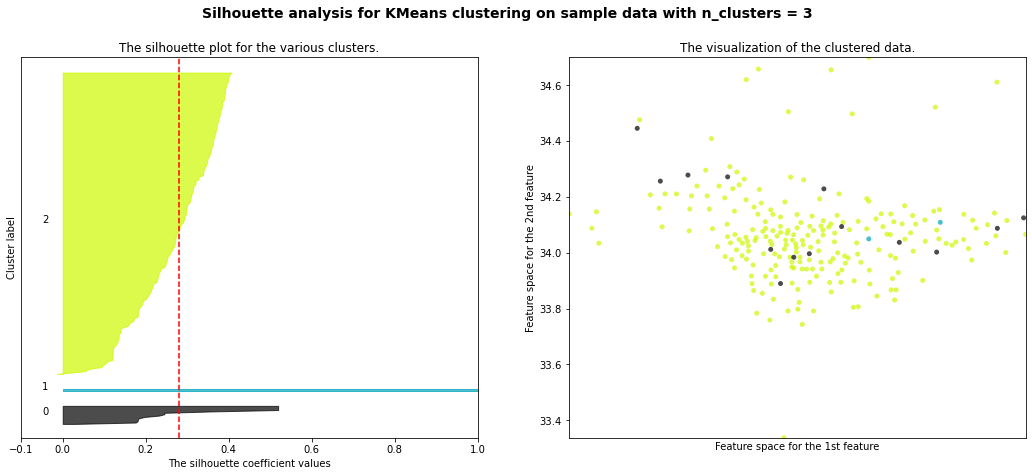

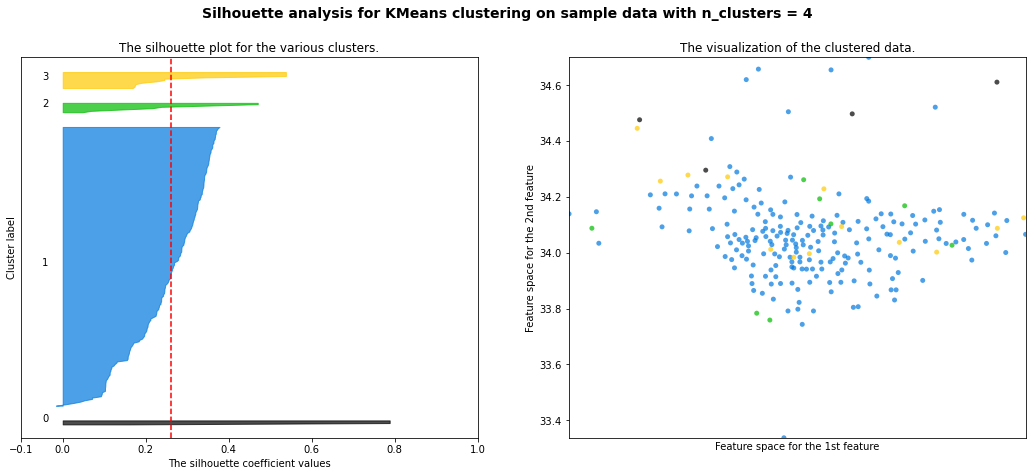

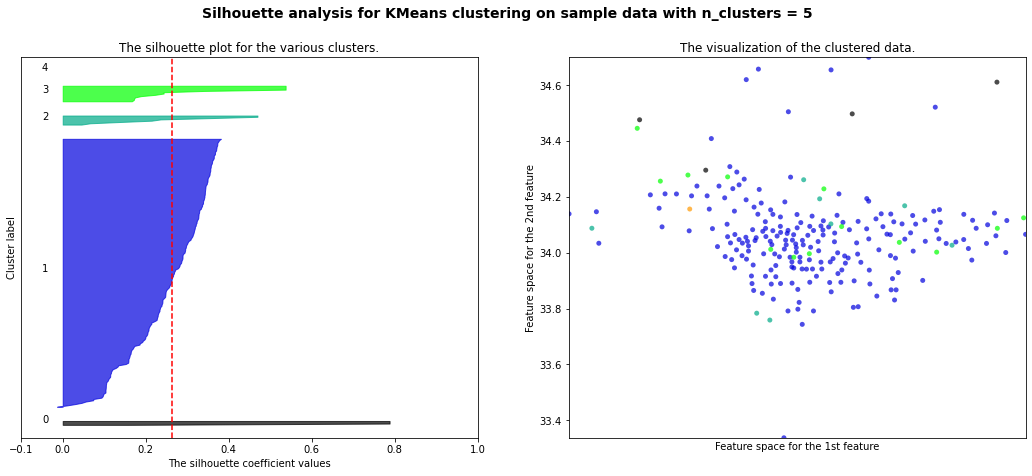

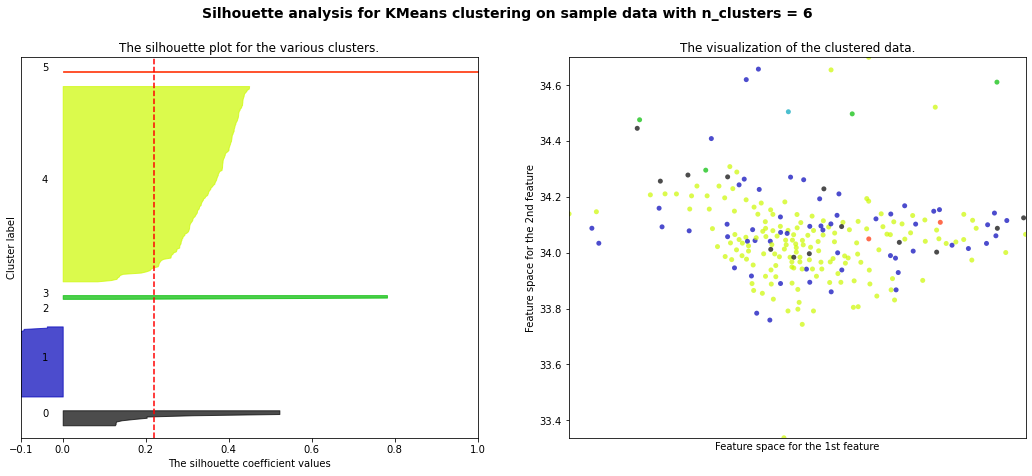

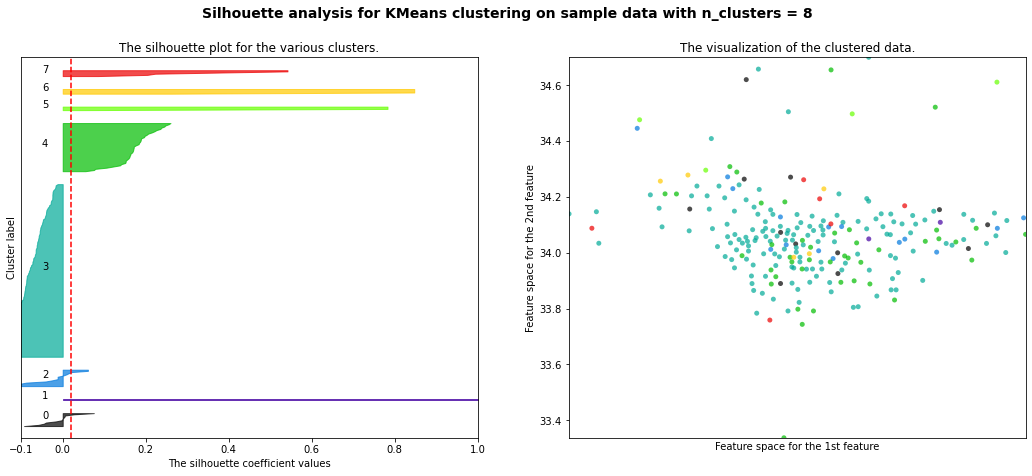

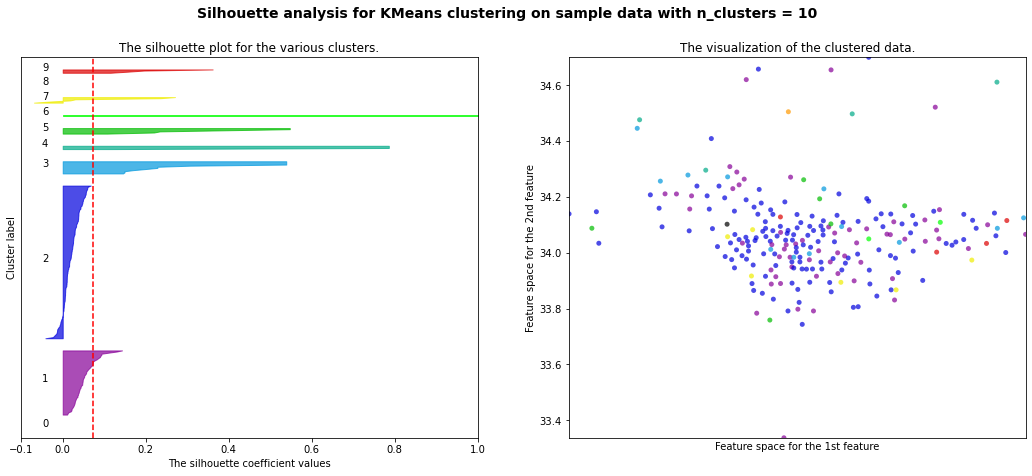

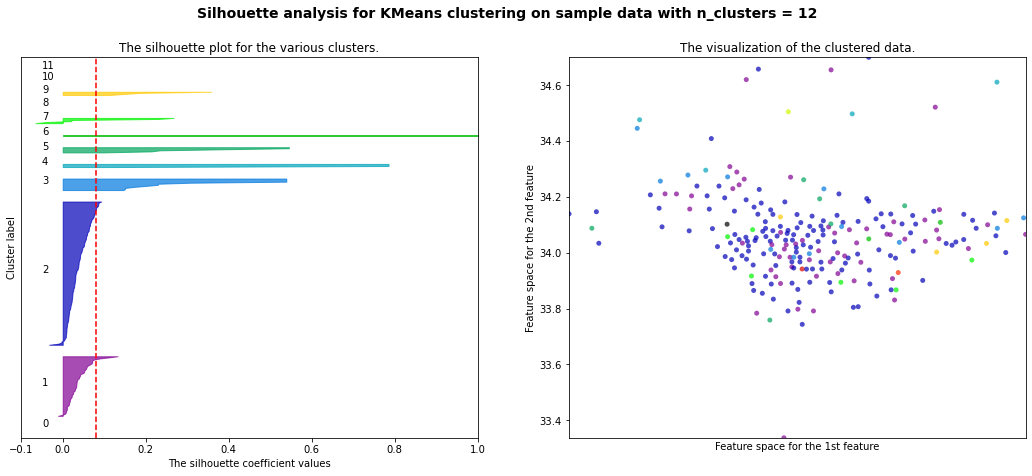

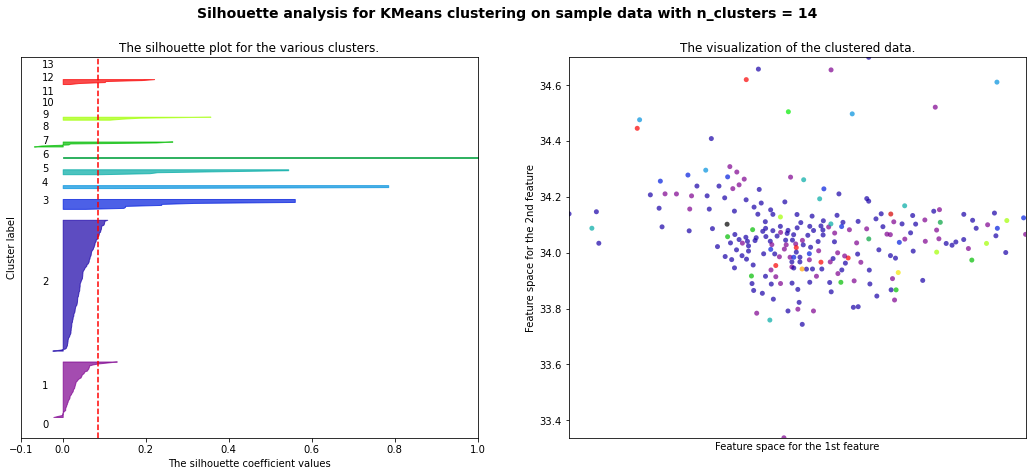

In [355]:
# Fetching our latituted and longitudes for later

X=np.zeros((len(la_merged['Longitude']), 2))
X[:,0] = la_merged['Longitude']
X[:,1] = la_merged['Latitude']
#X.shape

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(la_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(la_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(la_grouped_clustering, cluster_labels)
    
    #print('Size of cluster labels = ', len(cluster_labels))

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    ax2.set_xticks([-74, -73.8, -73.6, -73.4, -73.2, -73, -72.8])
    ax2.set_xlim([min(X[:,0]), max(X[:,0])])
    ax2.set_ylim([min(X[:,1]), max(X[:,1])])
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### We see that the optimum number of clusters is again 3
#### We will therfore build our model with n_clusters=3

In [356]:
# Building model with
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(la_grouped_clustering)
kmeans

array([2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [360]:
# add clustering labels
#la_merged.insert(0, 'Cluster Labels', kmeans)
la_merged['Cluster Labels']= kmeans
la_merged.head()

Cluster Labels     Neighborhood       1st Most Common Venue  \
0               2            Acton  Construction & Landscaping   
1               0  Adams-Normandie            Sushi Restaurant   
2               0     Agoura Hills        Fast Food Restaurant   
3               0       Agua Dulce                     Airport   
4               0         Alhambra           Convenience Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Yoga Studio  Fast Food Restaurant    English Restaurant   
1                  Park          Home Service           Gas Station   
2    Chinese Restaurant        Breakfast Spot            Restaurant   
3           Yoga Studio   Filipino Restaurant           Escape Room   
4            Bagel Shop   Sporting Goods Shop  Fast Food Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Escape Room  Ethiopian Restaurant           Fabric Shop   
1            Playground         Grocery Store            Taco Place   
2       Thai Restaurant          Liquor Store                Lounge   
3  Ethiopian Restaurant           Fabric Shop    Falafel Restaurant   
4             Pet Store        Hardware Store           Video Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0    Falafel Restaurant                  Farm         Farmers Market   
1    Falafel Restaurant   Empanada Restaurant     English Restaurant   
2      Sushi Restaurant                Bakery         Shipping Store   
3                  Farm        Farmers Market   Fast Food Restaurant   
4    Mexican Restaurant      Business Service            Pizza Place   

    Latitude   Longitude  
0  34.497355 -118.169810  
1  34.031461 -118.300208  
2  34.146736 -118.759885  
3  34.504927 -118.317104  
4  34.085539 -118.136512

#### Finally, let's visualize the resulting clusters on a map


In [362]:
# create map
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np


address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


<a id='item5'></a>


## 5. Examine Clusters


Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. This will also let us see of there are significant differences between the venues in New York and those in Los Angeles.

For this analysis we will use wordclouds, it's more convenient than analyzing rows of dataframe trying to extract information ourselves.


### 5.1 New York cluster analysis

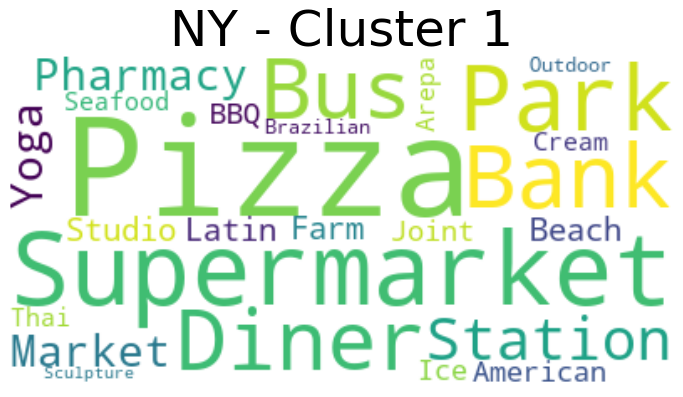

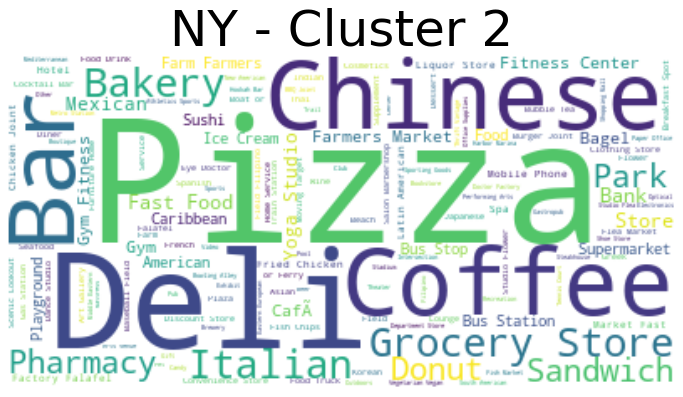

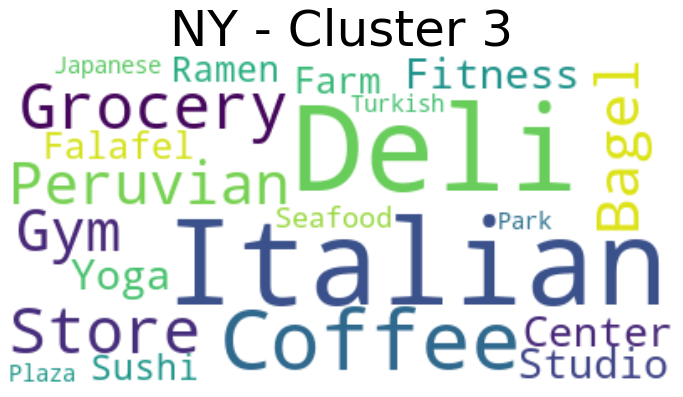

In [426]:
# Wordclouds for New York city clusters
for i in range(0,3):
    dff = ny_merged.loc[ny_merged['Cluster Labels'] == i, ny_merged.columns[[1] + list(range(4, ny_merged.shape[1]))]]
    dff1= dff.iloc[:,1:]
    dff1.to_csv('ny_cluster.txt',sep=',',index = False, header=False)

    from wordcloud import WordCloud, STOPWORDS

    # open the file and read it into a variable alice_novel
    ny_cluster = open('ny_cluster.txt', 'r').read()

    stopwords = set(STOPWORDS)
    stopwords = ['Restaurant','Shop','Bodega','Place']
    # instantiate a word cloud object
    ny_cluster0_wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords
    )

    # generate the word cloud
    ny_cluster0_wc.generate(ny_cluster)

    fig = plt.figure()
    fig.set_figwidth(12) # set width
    fig.set_figheight(14) # set height
    
    

    # display the word cloud
    plt.imshow(ny_cluster0_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('NY - Cluster %i' %(i+1), fontsize=50 )
    plt.show()
    

### 5.2 Los Angeles


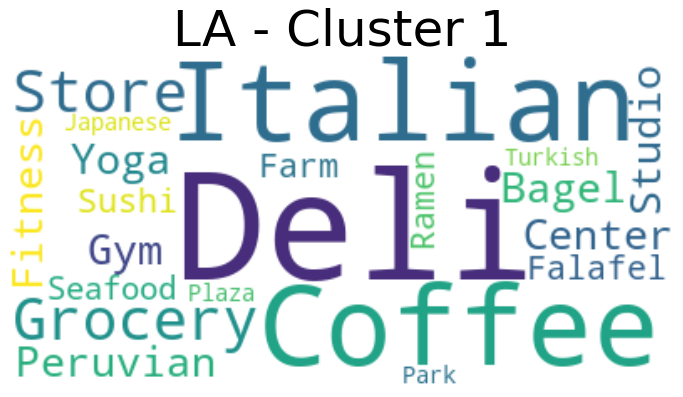

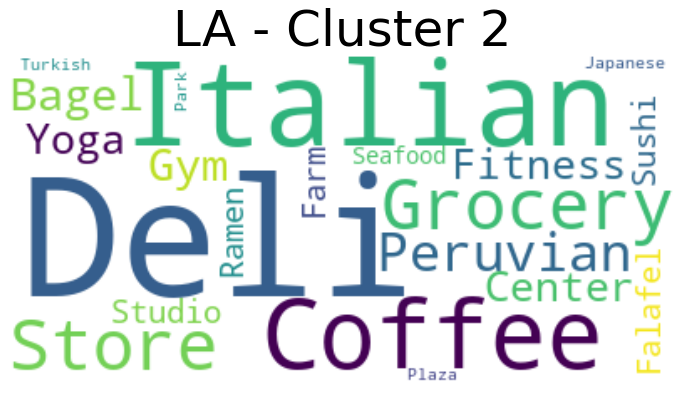

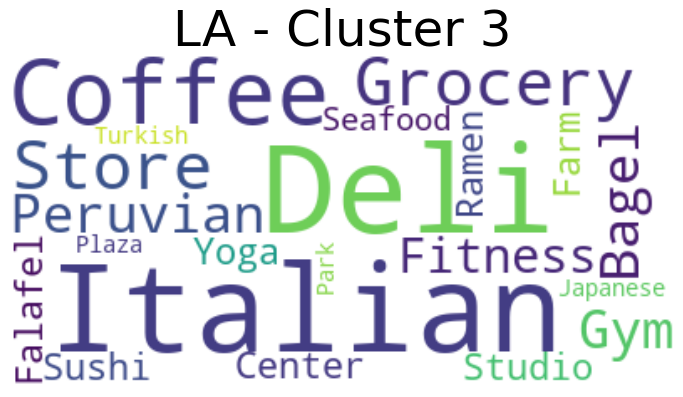

In [427]:
# Wordclouds for Los Angeles city clusters
for i in range(0,3):
    dff = la_merged.loc[la_merged['Cluster Labels'] == i, la_merged.columns[[1] + list(range(2, la_merged.shape[1]-2))]]
    dff1= dff.iloc[:,1:]
    dff1.to_csv('la_cluster.txt',sep=',',index = False, header=False)

    from wordcloud import WordCloud, STOPWORDS

    # open the file and read it into a variable alice_novel
    la_cluster = open('la_cluster.txt', 'r').read()

    stopwords = set(STOPWORDS)
    stopwords = ['Restaurant','Shop','Bodega','Place']

    # instantiate a word cloud object
    la_cluster_wc = WordCloud(
        background_color='white',
        max_words=2000,
        collocations=False,
        stopwords=stopwords
    )

    # generate the word cloud
    la_cluster_wc.generate(ny_cluster)

    fig = plt.figure()
    fig.set_figwidth(12) # set width
    fig.set_figheight(14) # set height
    
    

    # display the word cloud
    plt.imshow(la_cluster_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('LA - Cluster %i' %(i+1), fontsize=50 )
    plt.show()
    

### This ends this notebook, please refer to the report for more detailed discussions and conclusions